In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.spatial import distance

In [3]:
pubs_author_funder = pd.read_csv("../../data/nf_folder/Data/DerivedData/CleanedRawData/pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x:literal_eval(x) if pd.notnull(x) else "Not-Funded")
#pubs_author_funder['funding_units'] = pubs_author_funder['funder_country'].apply(lambda x: len(x))
pubs_author_funder.head()

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3


In [3]:
convert_df = pd.read_excel("..//..//..//data//Data//AdditionalData//cntry_convert.xlsx", sep=",")
convert_df.head()

,Clarivate country,Country,Continent,EU
0,*EFFACER,NaN,NaN,NaN
1,_indeterminé,_indeterminé,NaN,NaN
2,AFGHANISTAN,Afghanistan,Asia,NaN
3,SOUTH-AFRICA,South Africa,Africa,NaN
4,ALBANIA,Albania,Europe,NaN


In [4]:
eucntry_set = set(convert_df[convert_df.EU==1].Country.tolist())

In [5]:
discode=pd.read_csv("..//..//..//data//Data/RawData//discipline_code.csv")
discode = discode.set_index('Code_Discipline')['ESpecialite'].to_dict()
pubs_author_funder=pubs_author_funder.replace({'discipline':discode})
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],Computers,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",Mechanical Engineering,2009,0.703,9
2,30574691,[Russia],[Russia],Mechanical Engineering,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",General Mathematics,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],General Mathematics,2009,0.410,3


In [3]:
pubs_author_funder['author_distinct']=pubs_author_funder['author_country'].apply(lambda x:list(set(x)))


In [4]:
pubs_author_funder['funder_distinct']=pubs_author_funder['funder_country'].apply(
    lambda x:list(set(x)) if x!='Not-Funded' else 'Not-Funded')

In [5]:
pubs_author_funder['IntCol']=pubs_author_funder['author_distinct'].apply(
    lambda x: 1 if len(x)>1 else 0)
pubs_author_funder

,id,author_country,funder_country,discipline,year,rel_citation,citation,author_distinct,funder_distinct,IntCol
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,[Turkey],[Turkey],0
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,"[United States, France]",[United States],1
2,30574691,[Russia],[Russia],83,2009,0.312,4,[Russia],[Russia],0
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,[Spain],[Spain],0
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,"[Germany, Spain]",[Spain],1
...,...,...,...,...,...,...,...,...,...,...
12759123,65301180,[Pakistan],Not-Funded,89,2018,0.000,0,[Pakistan],Not-Funded,0
12759124,65301286,"[Singapore, Singapore]",Not-Funded,44,2017,0.264,1,[Singapore],Not-Funded,0
12759125,65301288,[Iran],Not-Funded,96,2017,0.000,0,[Iran],Not-Funded,0
12759126,65301295,[Israel],Not-Funded,96,2017,0.000,0,[Israel],Not-Funded,0


In [6]:
cntry_pub=pubs_author_funder.explode('author_distinct')
cntry_pub

,id,author_country,funder_country,discipline,year,rel_citation,citation,author_distinct,funder_distinct,IntCol
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,Turkey,[Turkey],0
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,United States,[United States],1
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,France,[United States],1
2,30574691,[Russia],[Russia],83,2009,0.312,4,Russia,[Russia],0
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,Spain,[Spain],0
...,...,...,...,...,...,...,...,...,...,...
12759123,65301180,[Pakistan],Not-Funded,89,2018,0.000,0,Pakistan,Not-Funded,0
12759124,65301286,"[Singapore, Singapore]",Not-Funded,44,2017,0.264,1,Singapore,Not-Funded,0
12759125,65301288,[Iran],Not-Funded,96,2017,0.000,0,Iran,Not-Funded,0
12759126,65301295,[Israel],Not-Funded,96,2017,0.000,0,Israel,Not-Funded,0


In [37]:
cntry_int_cnt=cntry_pub.groupby(['author_distinct','IntCol']).size().reset_index(name='count')
cntry_int_cnt=cntry_int_cnt.pivot_table(index='author_distinct',columns='IntCol',values='count')
cntry_int_cnt = cntry_int_cnt.div(cntry_int_cnt.sum(axis=1), axis=0).reset_index()
cntry_int_cnt = cntry_int_cnt.rename(columns={0:"notcol",1:'col'})
cntry_int_cnt.head()

IntCol,author_distinct,notcol,col
0,Afghanistan,0.070175,0.929825
1,Albania,0.285815,0.714185
2,Algeria,0.406483,0.593517
3,Andorra,0.014493,0.985507
4,Angola,0.031120,0.968880


In [24]:
cntry_int=cntry_pub[cntry_pub.IntCol==1]
def check_fund(x):
    label = 0
    if x.author_distinct in x.funder_distinct:
        label = 1
    return label
cntry_int['fund'] = cntry_int.apply(lambda x:check_fund(x),axis=1)


<ipython-input-24-9a6d0a1fa9cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntry_int['fund'] = cntry_int.apply(lambda x:check_fund(x),axis=1)


In [34]:
test=cntry_int.groupby(['author_distinct','fund']).size().reset_index(name='count')
test=test.pivot_table(index='author_distinct',columns='fund',values='count')
test=test.div(test.sum(axis=1), axis=0).reset_index()
test=test.rename(columns={0:"notfunded",1:'funded'})
test

fund,author_distinct,notfunded,funded
0,Afghanistan,0.997305,0.002695
1,Albania,0.986234,0.013766
2,Algeria,0.914643,0.085357
3,Andorra,0.897059,0.102941
4,Angola,0.916488,0.083512
...,...,...,...
201,Venezuela,0.858428,0.141572
202,Vietnam,0.777924,0.222076
203,Yemen,0.964494,0.035506
204,Zambia,0.950569,0.049431


In [38]:
meta=test.merge(cntry_int_cnt,on='author_distinct')
meta

,author_distinct,notfunded,funded,notcol,col
0,Afghanistan,0.997305,0.002695,0.070175,0.929825
1,Albania,0.986234,0.013766,0.285815,0.714185
2,Algeria,0.914643,0.085357,0.406483,0.593517
3,Andorra,0.897059,0.102941,0.014493,0.985507
4,Angola,0.916488,0.083512,0.031120,0.968880
...,...,...,...,...,...
201,Venezuela,0.858428,0.141572,0.389850,0.610150
202,Vietnam,0.777924,0.222076,0.226577,0.773423
203,Yemen,0.964494,0.035506,0.102403,0.897597
204,Zambia,0.950569,0.049431,0.047500,0.952500


In [41]:
meta.sort_values(by='col',ascending=False).head(30)

,author_distinct,notfunded,funded,notcol,col
44,Crimea,1.000000,NaN,NaN,1.000000
191,Tuvalu,1.000000,NaN,NaN,1.000000
134,Niue,1.000000,NaN,NaN,1.000000
56,Equatorial Guinea,0.843137,0.156863,NaN,1.000000
42,Cook Islands,1.000000,NaN,NaN,1.000000
40,Comoros,1.000000,NaN,NaN,1.000000
158,Sao Tome & Principe,1.000000,NaN,NaN,1.000000
166,Solomon Islands,0.978022,0.021978,NaN,1.000000
167,Somalia,1.000000,NaN,NaN,1.000000
186,Tonga,0.875000,0.125000,NaN,1.000000


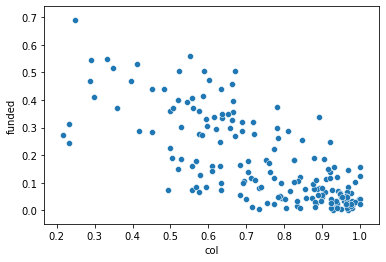

In [39]:
sns.scatterplot(x='col',y='funded',data=meta)

In [10]:
def assign_fundtype(data):
    if  (data['funder_country']=='Not-Funded'):
        return('notfunded')
    elif ("EU" in data['funder_distinct']) and (data['author_distinct'] in eucntry_set):
        return("cofund")
    elif (data['author_distinct'] in data['funder_distinct']) and (len(data['funder_distinct'])==1):
        if(data['IntCol']==0):
            return("SelfDomes")
        else:
            return('SelfColl')
    elif (data['author_distinct'] in data['funder_distinct']) and (len(data['funder_distinct'])>1):
        return("cofund")
    elif (data['author_distinct'] not in data['funder_distinct']):
        return("foreignfund")
cntry_pub['fund_type'] = cntry_pub.apply(assign_fundtype, axis=1)
cntry_pub.head(10)

,id,author_country,funder_country,discipline,year,rel_citation,citation,author_distinct,funder_distinct,IntCol,fund_type
0,30507292,[Turkey],[Turkey],Computers,2009,0.485,6,Turkey,[Turkey],0,SelfDomes
1,30574690,"[United States, France]","[United States, United States, United States, ...",Mechanical Engineering,2009,0.703,9,United States,[United States],1,SelfColl
1,30574690,"[United States, France]","[United States, United States, United States, ...",Mechanical Engineering,2009,0.703,9,France,[United States],1,foreignfund
2,30574691,[Russia],[Russia],Mechanical Engineering,2009,0.312,4,Russia,[Russia],0,SelfDomes
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",General Mathematics,2009,0.137,1,Spain,[Spain],0,SelfDomes
4,30585097,"[Germany, Spain]",[Spain],General Mathematics,2009,0.410,3,Spain,[Spain],1,SelfColl
4,30585097,"[Germany, Spain]",[Spain],General Mathematics,2009,0.410,3,Germany,[Spain],1,foreignfund
5,30585101,[United States],[United States],General Mathematics,2009,1.230,9,United States,[United States],0,SelfDomes
6,30585102,[United States],[United States],General Mathematics,2009,0.137,1,United States,[United States],0,SelfDomes
7,30585103,"[United Kingdom, Ireland, United Kingdom]",[Ireland],General Mathematics,2009,0.957,7,Ireland,[Ireland],1,SelfColl


In [11]:
cntry_pub

,id,author_country,funder_country,discipline,year,rel_citation,citation,author_distinct,funder_distinct,IntCol,fund_type
0,30507292,[Turkey],[Turkey],Computers,2009,0.485,6,Turkey,[Turkey],0,SelfDomes
1,30574690,"[United States, France]","[United States, United States, United States, ...",Mechanical Engineering,2009,0.703,9,United States,[United States],1,SelfColl
1,30574690,"[United States, France]","[United States, United States, United States, ...",Mechanical Engineering,2009,0.703,9,France,[United States],1,foreignfund
2,30574691,[Russia],[Russia],Mechanical Engineering,2009,0.312,4,Russia,[Russia],0,SelfDomes
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",General Mathematics,2009,0.137,1,Spain,[Spain],0,SelfDomes
...,...,...,...,...,...,...,...,...,...,...,...
12759123,65301180,[Pakistan],Not-Funded,General Mathematics,2018,0.000,0,Pakistan,Not-Funded,0,notfunded
12759124,65301286,"[Singapore, Singapore]",Not-Funded,General & Internal Medicine,2017,0.264,1,Singapore,Not-Funded,0,notfunded
12759125,65301288,[Iran],Not-Funded,General Physics,2017,0.000,0,Iran,Not-Funded,0,notfunded
12759126,65301295,[Israel],Not-Funded,General Physics,2017,0.000,0,Israel,Not-Funded,0,notfunded


In [11]:
cntry_annual=cntry_pub.groupby(['author_distinct','year','fund_type']).size().rename('count').reset_index()
cntry_annual=cntry_annual.pivot_table(index=['author_distinct','year'],columns='fund_type',values='count')
cntry_annual=cntry_annual.fillna(0)
cntry_annual=cntry_annual.div(cntry_annual.sum(axis=1),axis=0)
cntry_annual=cntry_annual.reset_index()
cntry_annual.head()

fund_type,author_distinct,year,SelfColl,SelfDomes,cofund,foreignfund,notfunded
0,Afghanistan,2009,0.000000,0.0,0.0,0.411765,0.588235
1,Afghanistan,2010,0.030303,0.0,0.0,0.363636,0.606061
2,Afghanistan,2011,0.000000,0.0,0.0,0.392857,0.607143
3,Afghanistan,2012,0.000000,0.0,0.0,0.256410,0.743590
4,Afghanistan,2013,0.000000,0.0,0.0,0.592593,0.407407


In [69]:
def plot_singlecountry(data):
    fig, ax = plt.subplots(figsize=(16,8))
    selfdomes=data.SelfDomes.values
    selfcoll=data.SelfColl.values
    cofund=data.cofund.values
    ff=data.foreignfund.values
    notfunded=data.notfunded.values
    labels=np.arange(2009,2019)
    ax.bar(labels,selfdomes,label="Domestic-Self")
    ax.bar(labels,selfcoll, bottom=selfdomes,label='Coll-Self')
    ax.bar(labels,cofund,bottom=selfdomes+selfcoll,label='cofund')
    ax.bar(labels,ff,bottom=selfdomes+selfcoll+cofund,label='foreign fund')
    ax.bar(labels,notfunded, bottom=selfdomes+selfcoll+cofund+ff,label='not funded')
    ax.legend(bbox_to_anchor=(1, 0.9),fontsize=15)
    plt.xticks(ticks=labels,labels=labels,rotation=45,horizontalalignment='right',
              fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel("Proportion of Publication",fontsize=20)
    return fig, ax

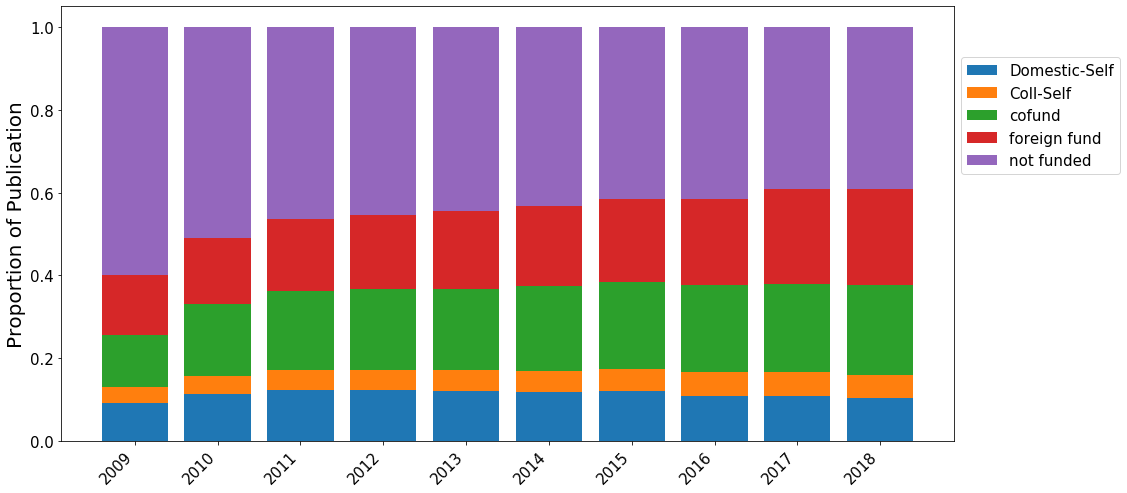

In [77]:
cntry='France'
cntry_filter = cntry_annual[cntry_annual.author_distinct==cntry]
fig,ax=plot_singlecountry(cntry_filter)
filename=cntry+".png"
plt.savefig(filename,bbox_inches='tight')

In [78]:
cntry_pub

,id,author_country,funder_country,discipline,year,rel_citation,citation,author_distinct,funder_distinct,IntCol,fund_type
0,30507292,[Turkey],[Turkey],Computers,2009,0.485,6,Turkey,[Turkey],0,SelfDomes
1,30574690,"[United States, France]","[United States, United States, United States, ...",Mechanical Engineering,2009,0.703,9,United States,[United States],1,SelfColl
1,30574690,"[United States, France]","[United States, United States, United States, ...",Mechanical Engineering,2009,0.703,9,France,[United States],1,foreignfund
2,30574691,[Russia],[Russia],Mechanical Engineering,2009,0.312,4,Russia,[Russia],0,SelfDomes
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",General Mathematics,2009,0.137,1,Spain,[Spain],0,SelfDomes
...,...,...,...,...,...,...,...,...,...,...,...
12759123,65301180,[Pakistan],Not-Funded,General Mathematics,2018,0.000,0,Pakistan,Not-Funded,0,notfunded
12759124,65301286,"[Singapore, Singapore]",Not-Funded,General & Internal Medicine,2017,0.264,1,Singapore,Not-Funded,0,notfunded
12759125,65301288,[Iran],Not-Funded,General Physics,2017,0.000,0,Iran,Not-Funded,0,notfunded
12759126,65301295,[Israel],Not-Funded,General Physics,2017,0.000,0,Israel,Not-Funded,0,notfunded


In [12]:
typelist=cntry_pub.fund_type.unique()
cntry_type=cntry_pub.groupby(['author_distinct','fund_type']).size().rename('count').reset_index()
cntry_type=cntry_type.pivot_table(index=['author_distinct'],columns='fund_type',values='count')
cntry_type=cntry_type.fillna(0)
cntry_type['total']=cntry_type.sum(axis=1)
cntry_type[typelist]=cntry_type[typelist].div(cntry_type['total'],axis=0)
cntry_type=cntry_type.reset_index()
cntry_type.head()

fund_type,author_distinct,SelfColl,SelfDomes,cofund,foreignfund,notfunded,total
0,Afghanistan,0.002506,0.000000,0.000000,0.446115,0.551378,399.0
1,Albania,0.006320,0.001404,0.003511,0.245787,0.742978,1424.0
2,Algeria,0.029422,0.031698,0.022476,0.144038,0.772366,25049.0
3,Andorra,0.072464,0.000000,0.028986,0.405797,0.492754,69.0
4,Angola,0.008299,0.000000,0.072614,0.518672,0.400415,482.0


In [14]:
n=20
topn=cntry_type.sort_values(by='total',ascending=False).head(n)
topn=topn.sort_values(by='SelfDomes',ascending=False)
topn

fund_type,author_distinct,SelfColl,SelfDomes,cofund,foreignfund,notfunded,total
38,China,0.104712,0.606537,0.071828,0.042901,0.174023,2365486.0
169,South Korea,0.092556,0.473398,0.076023,0.071455,0.286567,490587.0
181,Taiwan,0.067559,0.455857,0.092393,0.092659,0.291531,232788.0
24,Brazil,0.089562,0.369400,0.103854,0.070068,0.367116,376576.0
91,Japan,0.058556,0.346515,0.074243,0.103074,0.417611,762683.0
153,Russia,0.069491,0.341135,0.121489,0.094414,0.373470,315048.0
196,United States,0.078781,0.340289,0.125317,0.117828,0.337785,3208809.0
82,India,0.041361,0.309799,0.037960,0.080291,0.530589,546864.0
33,Canada,0.079265,0.254008,0.168325,0.191806,0.306596,539176.0
84,Iran,0.038114,0.230783,0.019720,0.049288,0.662095,262216.0


In [21]:
def plot_topncountry(data):
    fig, ax = plt.subplots(figsize=(16,8))
    selfdomes=data.SelfDomes.values
    selfcoll=data.SelfColl.values
    cofund=data.cofund.values
    ff=data.foreignfund.values
    notfunded=data.notfunded.values
    labels=data.author_distinct
    ax.bar(labels,selfdomes,label="Domestic-Self",color="#0367A6")
    ax.bar(labels,selfcoll, bottom=selfdomes,label='Coll-Self',color="#6BA5F2")
    ax.bar(labels,cofund,bottom=selfdomes+selfcoll,label='cofund',color="#FFA522")
    ax.bar(labels,ff,bottom=selfdomes+selfcoll+cofund,label='foreign fund',color="#F25F29")
    ax.bar(labels,notfunded, bottom=selfdomes+selfcoll+cofund+ff,label='not funded',color="#BFBFBF")
    ax.legend(bbox_to_anchor=(1, 0.9),fontsize=15)
    plt.xticks(ticks=labels,labels=labels,rotation=45,horizontalalignment='right',
              fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel("Proportion of Publication",fontsize=20)
    return fig, ax

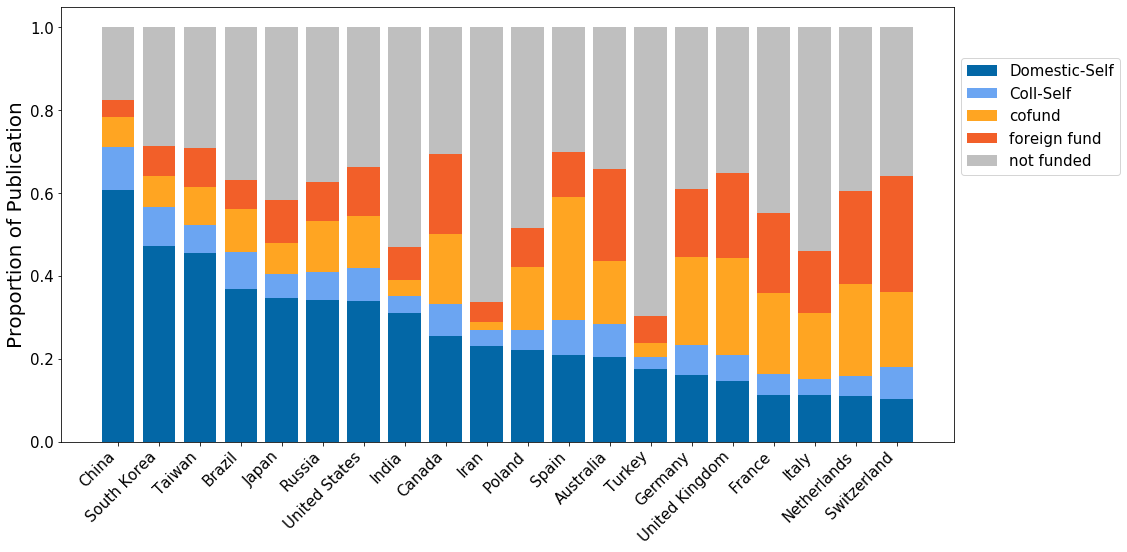

In [32]:
fig, ax = plot_topncountry(topn)
plt.savefig("recievefund.png",bbox_inches="tight")

In [24]:
cntry_meta = pd.read_csv("country_metadata.csv",engine='python')
cntry_region=cntry_meta[['country','Region Name']]
cntry_region.head()

,country,Region Name
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,American-Samoa,Oceania
4,Andorra,Europe


In [25]:
cntry_type

fund_type,author_distinct,SelfColl,SelfDomes,cofund,foreignfund,notfunded,total
0,Afghanistan,0.002506,0.000000,0.000000,0.446115,0.551378,399.0
1,Albania,0.006320,0.001404,0.003511,0.245787,0.742978,1424.0
2,Algeria,0.029422,0.031698,0.022476,0.144038,0.772366,25049.0
3,Andorra,0.072464,0.000000,0.028986,0.405797,0.492754,69.0
4,Angola,0.008299,0.000000,0.072614,0.518672,0.400415,482.0
...,...,...,...,...,...,...,...
201,Venezuela,0.040497,0.070430,0.050233,0.254894,0.583946,9655.0
202,Vietnam,0.081902,0.131052,0.093935,0.381531,0.311580,24517.0
203,Yemen,0.012017,0.000000,0.020376,0.381923,0.585684,1914.0
204,Zambia,0.009583,0.001250,0.038333,0.649167,0.301667,2400.0


In [26]:
cntry_type['coll']=cntry_type['cofund']+cntry_type['foreignfund']+cntry_type['SelfColl']
cntry_type

fund_type,author_distinct,SelfColl,SelfDomes,cofund,foreignfund,notfunded,total,coll
0,Afghanistan,0.002506,0.000000,0.000000,0.446115,0.551378,399.0,0.448622
1,Albania,0.006320,0.001404,0.003511,0.245787,0.742978,1424.0,0.255618
2,Algeria,0.029422,0.031698,0.022476,0.144038,0.772366,25049.0,0.195936
3,Andorra,0.072464,0.000000,0.028986,0.405797,0.492754,69.0,0.507246
4,Angola,0.008299,0.000000,0.072614,0.518672,0.400415,482.0,0.599585
...,...,...,...,...,...,...,...,...
201,Venezuela,0.040497,0.070430,0.050233,0.254894,0.583946,9655.0,0.345624
202,Vietnam,0.081902,0.131052,0.093935,0.381531,0.311580,24517.0,0.557368
203,Yemen,0.012017,0.000000,0.020376,0.381923,0.585684,1914.0,0.414316
204,Zambia,0.009583,0.001250,0.038333,0.649167,0.301667,2400.0,0.697083


In [29]:
cntry_region.columns

Index(['country', 'Region Name'], dtype='object')

In [30]:
cntry_type=cntry_type.merge(cntry_region,left_on="author_distinct",right_on="country",how="inner")
cntry_type.to_csv("receive_fundtype.csv",index=False)

In [25]:
cntry_type.to_csv("cntry_fundtype.csv",index=False)

In [31]:
cntry_type['Region Name'].unique()

array(['Asia', 'Europe', 'Africa', nan, 'Americas', 'Oceania'],
      dtype=object)

In [29]:
dis_type.head()

,id,author_distinct,funder_distinct,year,discipline
0,30507292,[Turkey],[Turkey],2009,Computers
1,30574690,"[United States, France]",[United States],2009,Mechanical Engineering
2,30574691,[Russia],[Russia],2009,Mechanical Engineering
3,30585095,[Spain],[Spain],2009,General Mathematics
4,30585097,"[Germany, Spain]",[Spain],2009,General Mathematics


In [8]:
def type_dis(authorlist,funderlist):
    if funderlist=='Not-Funded':
        return 'Not-Funded'
    elif len(authorlist)==1 and len(funderlist)==1 and(authorlist==funderlist):
        return 'DomeFunded'
    else:
        return "Collaborate"
dis_type = pubs_author_funder[['id','author_distinct','funder_distinct','year','discipline']]
dis_type['type']=dis_type[['author_distinct','funder_distinct']].apply(
    lambda x:type_dis(x.author_distinct,x.funder_distinct),axis=1)

<ipython-input-8-5f067bd01435>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_type['type']=dis_type[['author_distinct','funder_distinct']].apply(


In [9]:
dis_type.head()

,id,author_distinct,funder_distinct,year,discipline,type
0,30507292,[Turkey],[Turkey],2009,Computers,DomeFunded
1,30574690,"[France, United States]",[United States],2009,Mechanical Engineering,Collaborate
2,30574691,[Russia],[Russia],2009,Mechanical Engineering,DomeFunded
3,30585095,[Spain],[Spain],2009,General Mathematics,DomeFunded
4,30585097,"[Germany, Spain]",[Spain],2009,General Mathematics,Collaborate


In [10]:
dis_type=dis_type.groupby(['discipline','type']).size().reset_index()
dis_type.head()

,discipline,type,0
0,Acoustics,Collaborate,6328
1,Acoustics,DomeFunded,12089
2,Acoustics,Not-Funded,11965
3,Addictive Diseases,Collaborate,3930
4,Addictive Diseases,DomeFunded,11066


In [ ]:
cntry_type[typelist].div(cntry_type['total'],axis=0

type,Collaborate,DomeFunded,Not-Funded
discipline,,,
Acoustics,0.208281,0.397900,0.393819
Addictive Diseases,0.139332,0.392328,0.468340
Aerospace Technology,0.125696,0.340051,0.534253
Agricult & Food Science,0.168588,0.366616,0.464796
Allergy,0.292102,0.273329,0.434569
...,...,...,...
Surgery,0.050406,0.145482,0.804112
Tropical Medicine,0.356968,0.214376,0.428655
Urology,0.101372,0.186306,0.712322


In [12]:
dis_type.columns=['discipline','type','count']
dis_type = dis_type.pivot(index='discipline',columns='type',values='count')
dis_type.head()

type,Collaborate,DomeFunded,Not-Funded
discipline,,,
Acoustics,6328,12089,11965
Addictive Diseases,3930,11066,13210
Aerospace Technology,3655,9888,15535
Agricult & Food Science,50901,110691,140334
Allergy,3750,3509,5579


In [13]:
dis_type = dis_type.div(dis_type.sum(axis=1),axis=0)

In [17]:
dis_type.sort_values(by='DomeFunded',ascending=False).head(20)

type,Collaborate,DomeFunded,Not-Funded
discipline,,,
Organic Chemistry,0.172234,0.597682,0.230085
General Chemistry,0.209643,0.544569,0.245787
Physical Chemistry,0.227941,0.523856,0.248203
Inorganic & Nuclear Chemistry,0.228068,0.521451,0.250481
Biochemistry & Molecular Biology,0.269469,0.510991,0.219540
Chemical Physics,0.240110,0.502511,0.257380
Biomedical Engineering,0.203175,0.495184,0.301641
Cellular Biology Cytology & Histology,0.279994,0.494852,0.225155
Virology,0.274467,0.493371,0.232162


In [15]:
dis_type.to_csv("dis_fundtype.csv",index=False)

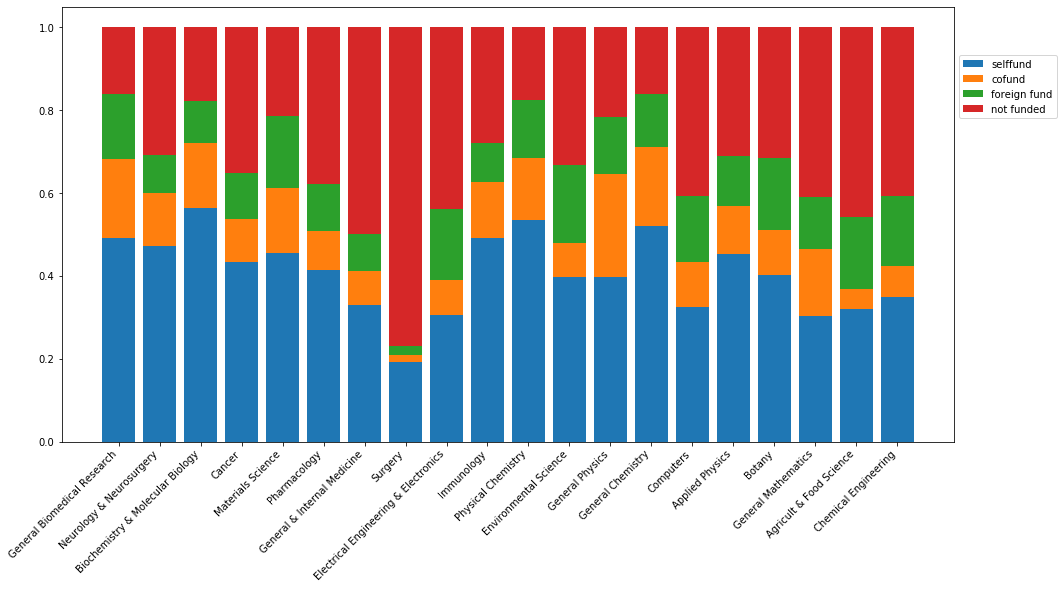

In [76]:
selffund=cntry_df.selffund.values
cofund=cntry_df.cofund.values
ff=cntry_df.foreignfund.values
notfunded=cntry_df.notfunded.values
labels=cntry_df.discipline.values.tolist()
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(labels,selffund,label="selffund")
ax.bar(labels,cofund,bottom=selffund,label='cofund')
ax.bar(labels,ff,bottom=selffund+cofund,label='foreign fund')
ax.bar(labels,notfunded, bottom=selffund+cofund+ff,label='not funded')
ax.legend(bbox_to_anchor=(1, 0.9))
plt.xticks(rotation=45,horizontalalignment='right')
plt.savefig("United States.pdf",bbox_inches="tight")